In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
marvel_df = pd.read_csv('/home/blair/cognixia_workspace/jumplus/JUMPlus/marvel/charcters_stats.csv')
marvel_df.drop_duplicates()
marvel_df.dropna()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [15]:
marvel_df.head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233


In [13]:
rows = marvel_df.shape[0]
columns = marvel_df.shape[1]

f'Rows = {rows} | Columns = {columns}'

'Rows = 611 | Columns = 9'

In [33]:
alignment_counts = marvel_df['Alignment'].value_counts()
alignment_counts_df = pd.DataFrame(alignment_counts)
alignment_counts_df = alignment_counts_df.reset_index()
alignment_counts_df.columns = ['Alignment', 'Count']
alignment_counts_df.style.hide()

Alignment,Count
good,432
bad,165
neutral,11


In [44]:
good_alignment = marvel_df[marvel_df['Alignment'] == 'good']
good_alignment

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


In [45]:
good_alignment.head().style.hide()

Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
3-D Man,good,50,31,43,32,25,52,233
A-Bomb,good,38,100,17,80,17,64,316
Abe Sapien,good,88,14,35,42,35,85,299
Abin Sur,good,50,90,53,64,84,65,406
Adam Monroe,good,63,10,12,100,71,64,320


In [55]:
good_alignment = marvel_df[marvel_df['Alignment'] == 'good']
alignment_and_speed = good_alignment.sort_values(by='Speed', ascending=False)
alignment_and_speed.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
231,Flash III,good,63,10,100,60,83,32,348
304,Jack of Hearts,good,63,55,100,30,70,30,348
295,Impulse,good,50,10,100,60,63,60,343
525,Stardust,good,88,85,100,110,100,85,568
447,Quicksilver,good,63,28,100,60,57,56,364


In [56]:
good_alignment = marvel_df[marvel_df['Alignment'] == 'good']
alignment_and_power = good_alignment.sort_values(by='Power', ascending=False)
alignment_and_power.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
609,Zatanna,good,75,10,23,28,100,56,292
546,Thor,good,69,100,92,100,100,85,546
511,Spawn,good,75,60,50,90,100,95,470
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467


In [87]:
good_alignment_high_power = marvel_df[(marvel_df['Alignment'] == 'good') & (marvel_df['Power'] == 100)]
good_alignment_high_power.count()


Name            33
Alignment       33
Intelligence    33
Strength        33
Speed           33
Durability      33
Power           33
Combat          33
Total           33
dtype: int64

In [90]:
good_alignment_high_power.shape

(33, 9)

In [91]:
good_alignment_high_power

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


In [93]:
top_5 = good_alignment_high_power.head()
top_5

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


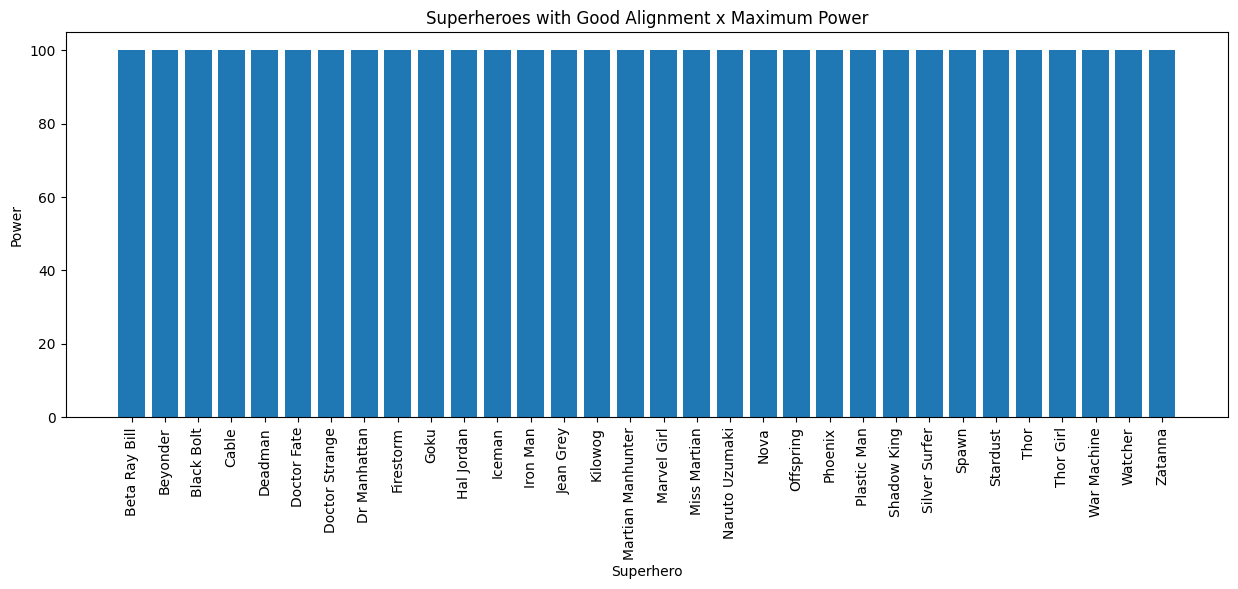

In [121]:
plt.figure(figsize=(15, 5))
plt.bar(good_alignment_high_power['Name'], good_alignment_high_power['Power'])
plt.xlabel('Superhero')
plt.ylabel('Power')
plt.title('Superheroes with Good Alignment x Maximum Power')
plt.xticks(rotation=90)

plt.show()

In [100]:
bad_alignment = marvel_df[marvel_df['Alignment'] == 'bad']
bad_alignment

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...
586,Warp,bad,38,10,23,28,63,50,212
590,Weapon XI,bad,1,1,1,1,0,1,5
593,Willis Stryker,bad,38,16,23,28,41,60,206
605,Yellow Claw,bad,1,1,1,1,0,1,5


In [101]:
bad_alignment.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


In [102]:
bad_alignment = marvel_df[marvel_df['Alignment'] == 'bad']
alignment_and_speed = bad_alignment.sort_values(by='Speed', ascending=False)
alignment_and_speed.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579


In [103]:
bad_alignment = marvel_df[marvel_df['Alignment'] == 'bad']
alignment_and_intelligence = bad_alignment.sort_values(by='Intelligence', ascending=False)
alignment_and_intelligence.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
336,Leader,bad,100,10,12,14,58,42,236
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429


In [104]:
bad_alignment = marvel_df[marvel_df['Alignment'] == 'bad']
alignment_and_total = bad_alignment.sort_values(by='Total', ascending=False)
alignment_and_total.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


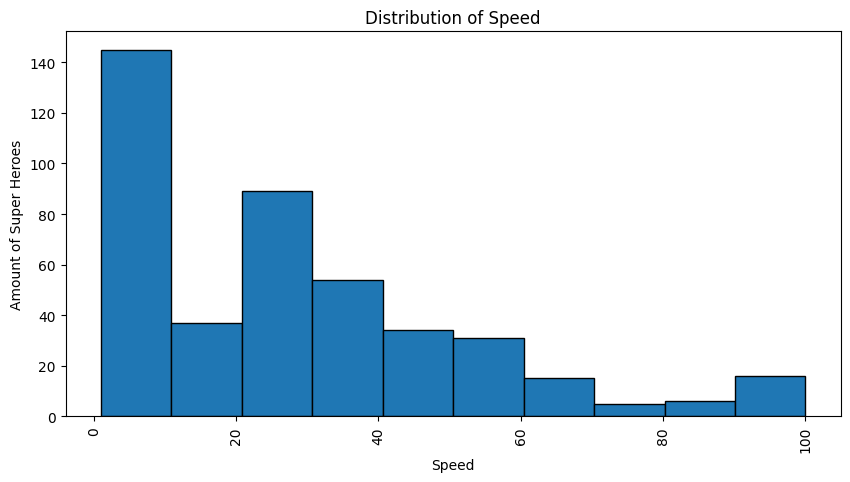

In [161]:
good_alignment = marvel_df[marvel_df['Alignment'] == 'good']
plt.figure(figsize=(10, 5))
plt.hist(good_alignment['Speed'], edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Amount of Super Heroes')
plt.title('Distribution of Speed')
plt.xticks(rotation=90)

plt.show()
# good_alignment

In [174]:
px.histogram(good_alignment['Speed'], labels={'value':'speed'})